<a href="https://colab.research.google.com/github/emmab2022/Phddataset/blob/main/RF_GBM_DT_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setting Up**

**Import Necessary Libraries**

In [182]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading and Splitting the Dataset**

**Load Data**

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/emmab2022/Phddataset/main/v16Final%20PHD%20Data%20Set.csv')
data

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA,GRADUATED
0,2,2,2,1,5,1,1,3,1
1,2,1,2,1,5,1,1,3,1
2,2,2,2,1,2,1,1,3,1
3,2,2,2,1,5,1,1,3,1
4,2,2,2,1,2,1,1,3,1
...,...,...,...,...,...,...,...,...,...
9994,2,1,1,4,5,2,1,4,2
9995,2,1,1,4,2,2,1,4,2
9996,2,1,2,4,2,1,2,3,2
9997,2,2,2,4,1,1,2,3,2


**Split Data**

In [7]:
X = data.drop('GRADUATED', axis=1)
y = data['GRADUATED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA
9253,2,2,1,2,5,2,1,1
1561,2,2,2,2,5,1,2,4
1670,2,2,1,2,1,1,2,4
6086,2,1,1,4,2,2,1,4
7332,2,1,2,1,5,1,1,2
...,...,...,...,...,...,...,...,...
5734,2,2,1,4,2,2,1,1
5191,2,1,2,4,2,1,2,2
5390,2,2,1,4,2,2,1,3
860,2,2,1,1,5,1,1,1


In [9]:
X_test

,TYPE,GENERATION,GENDER,AGE,ETHNICITY,PELL,ATTENDANCE,ENTRY GPA
5344,2,2,1,4,2,2,1,4
7444,2,1,1,1,1,2,1,2
1731,2,1,2,2,2,1,2,4
8719,2,1,1,2,2,1,2,3
4521,2,2,1,3,2,2,1,4
...,...,...,...,...,...,...,...,...
9448,2,1,1,2,2,2,1,1
8284,2,2,1,1,2,2,1,1
7852,2,1,2,1,5,1,1,1
1095,2,2,1,1,5,1,1,1


## **Model Building, Evaluating, and Iterative Tuning**

### **Model 1 - Random Forest Classifier**

**Random Forest 1**

**Build the Model**

In [10]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

**Evaluate the Model**

**Accuracy Score**

In [11]:
y_pred_rf1 = rf1.predict(X_test)
accuracy_rf1 = accuracy_score(y_test, y_pred_rf1)
print("RF1 Accuracy:", accuracy_rf1)

RF1 Accuracy: 0.8335


**Validation Score**

In [12]:
scores_rf1 = cross_val_score(rf1, X, y, cv=5)
avg_score_rf1 = np.mean(scores_rf1)
print("RF1 Validation Score", scores_rf1)

RF1 Validation Score [0.4455     0.8285     0.8075     0.8595     0.80490245]


**Mean Accuracy and Standard Deviation Score**

In [13]:
mean_rf1 = np.mean(scores_rf1)
std_dev_rf1 = np.std(scores_rf1)
print(f"RF1: Mean Accuracy = {mean_rf1:.2f}, Standard Deviation = {std_dev_rf1:.2f}")

RF1: Mean Accuracy = 0.75, Standard Deviation = 0.15


**F1-Score**

In [183]:
f1_rf1 = f1_score(y_test, y_pred_rf1)
f1_rf2 = f1_score(y_test, y_pred_rf2)
f1_rf3 = f1_score(y_test, y_pred_rf3)

print("F1 Score for RF1:", f1_rf1)
print("F1 Score for RF2:", f1_rf2)
print("F1 Score for RF3:", f1_rf3)

F1 Score for RF1: 0.8790410461314929
F1 Score for RF2: 0.8771407297096054
F1 Score for RF3: 0.866101069715972


In [14]:
print(classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           1       0.82      0.94      0.88      1285
           2       0.86      0.64      0.73       715

    accuracy                           0.83      2000
   macro avg       0.84      0.79      0.81      2000
weighted avg       0.84      0.83      0.83      2000



**Precision Score**

In [179]:
precision_rf1 = precision_score(y_test, y_pred_rf1)
precision_rf2 = precision_score(y_test, y_pred_rf2)
precision_rf3 = precision_score(y_test, y_pred_rf3)

print("Precision Score for RF1:", precision_rf1)
print("Precision Score for RF2:", precision_rf2)
print("Precision Score for RF3:", precision_rf3)


Precision Score for RF1: 0.8242506811989101
Precision Score for RF2: 0.8408279800142755
Precision Score for RF3: 0.82328190743338


**Recall Score**

In [180]:
recall_rf1 = recall_score(y_test, y_pred_rf1)
recall_rf2 = recall_score(y_test, y_pred_rf2)
recall_rf3 = recall_score(y_test, y_pred_rf3)

print("Recall Score for RF1:", recall_rf1)
print("Recall Score for RF2:", recall_rf2)
print("Recall Score for RF3:", recall_rf3)


Recall Score for RF1: 0.9416342412451362
Recall Score for RF2: 0.9167315175097276
Recall Score for RF3: 0.9136186770428015


**Feature Importance**

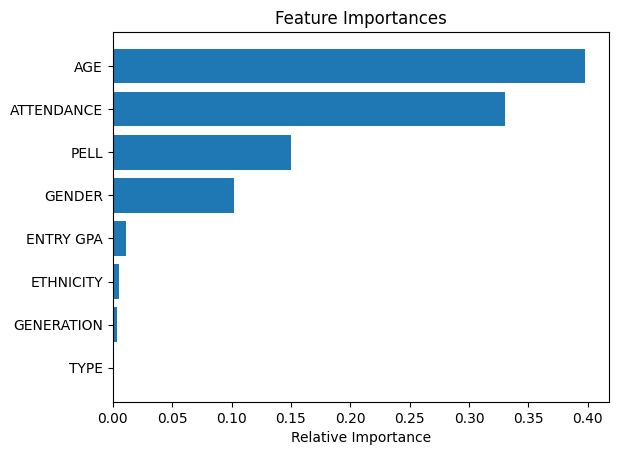

In [15]:
importances = rf1.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Random Forest 2**

**Build the Model**

In [16]:
rf2 = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

**Evaluate the Model**

**Accuracy Score**

In [172]:
y_pred_rf2 = rf2.predict(X_test)
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
print("RF2 Accuracy:", accuracy_rf2)

RF2 Accuracy: 0.835


**Validation Score**

In [18]:
scores_rf2 = cross_val_score(rf2, X, y, cv=5)
avg_score_rf2 = np.mean(scores_rf2)
print("RF2 Validation Score", scores_rf2)

RF2 Validation Score [0.4745     0.805      0.8075     0.7935     0.80490245]


**Mean Accuracy and Standard Deviation Score**

In [19]:
mean_rf2 = np.mean(scores_rf2)
std_dev_rf2 = np.std(scores_rf2)
print(f"RF2 Mean Accuracy = {mean_rf2:.2f}, Standard Deviation = {std_dev_rf2:.2f}")

RF2 Mean Accuracy = 0.74, Standard Deviation = 0.13


**F1-Score**

In [20]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           1       0.84      0.92      0.88      1285
           2       0.82      0.69      0.75       715

    accuracy                           0.83      2000
   macro avg       0.83      0.80      0.81      2000
weighted avg       0.83      0.83      0.83      2000



**Feature Importance**

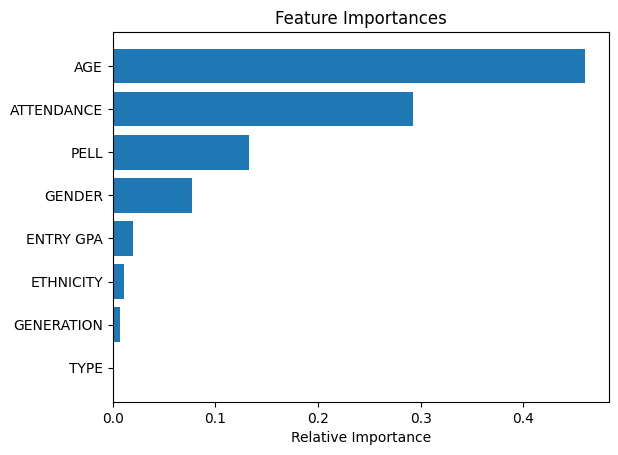

In [21]:
importances = rf2.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Random Forest 3**

**Build the Model**

In [28]:
rf3 = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

**Evaluate the Model**

**Accuracy Score**

In [29]:
y_pred_rf3 = rf3.predict(X_test)
accuracy_rf3 = accuracy_score(y_test, y_pred_rf3)
print("RF3 Accuracy:", accuracy_rf3)

RF3 Accuracy: 0.8185


**Validation Score**

In [30]:
scores_rf3 = cross_val_score(rf3, X, y, cv=5)
avg_score_rf3 = np.mean(scores_rf3)
print("RF3 Validation Score", scores_rf3)

RF3 Validation Score [0.472      0.5465     0.5395     0.5355     0.80490245]


**Mean Accuracy and Standard Deviation Score**

In [31]:
mean_rf3 = np.mean(scores_rf3)
std_dev_rf3 = np.std(scores_rf3)
print(f"RF3 Mean Accuracy = {mean_rf3:.2f}, Standard Deviation = {std_dev_rf3:.2f}")

RF3 Mean Accuracy = 0.58, Standard Deviation = 0.12


**F1-Score**

In [32]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           1       0.84      0.92      0.88      1285
           2       0.82      0.69      0.75       715

    accuracy                           0.83      2000
   macro avg       0.83      0.80      0.81      2000
weighted avg       0.83      0.83      0.83      2000



**Feature Importance**

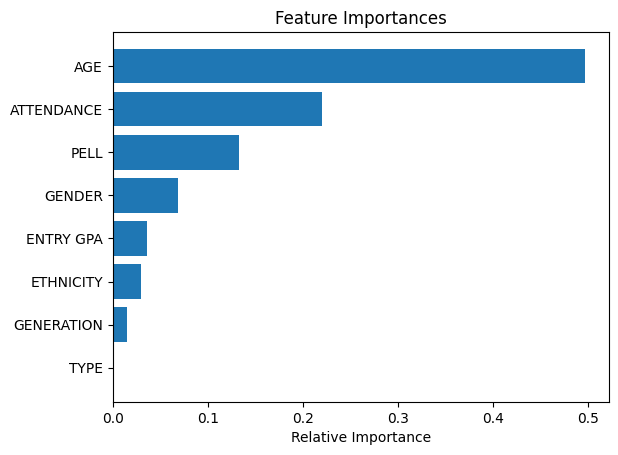

In [33]:
importances = rf3.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Comparing RF Results**

In [34]:
results = pd.DataFrame({
    'Model': ['RF1', 'RF2', 'RF3'],
    'Accuracy': [accuracy_rf1, accuracy_rf2, accuracy_rf3],
    'Avg CV Score': [avg_score_rf1, avg_score_rf2, avg_score_rf3],
    'Mean Accuracy': [mean_rf1, mean_rf2, mean_rf3],
    'Standard Deviation': [std_dev_rf1, std_dev_rf2, std_dev_rf3],
})

print(results)

  Model  Accuracy  Avg CV Score  Mean Accuracy  Standard Deviation
0   RF1    0.8335       0.74918        0.74918            0.153095
1   RF2    0.8350       0.73708        0.73708            0.131380
2   RF3    0.8185       0.57968        0.57968            0.115747


**Visualize the Results**

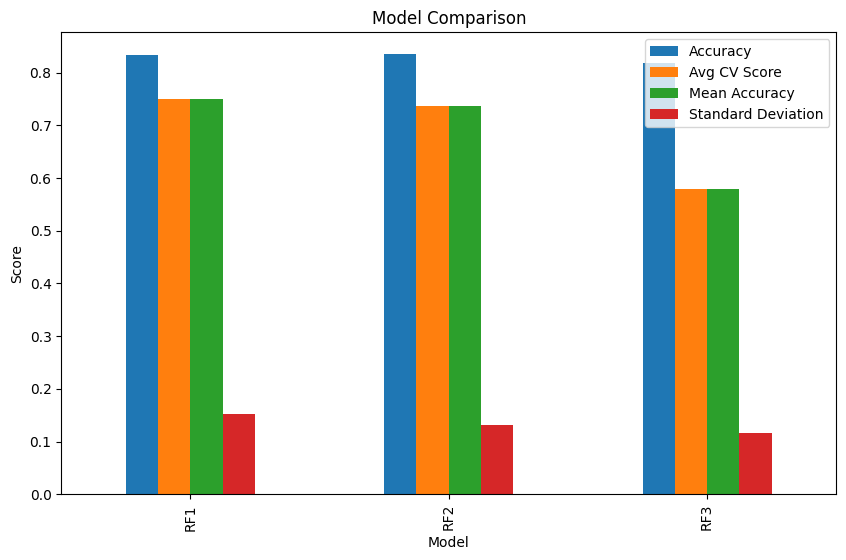

In [35]:
results.plot(x='Model', y=['Accuracy', 'Avg CV Score', 'Mean Accuracy', 'Standard Deviation'], kind='bar', figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()

**Color Gradient**

In [36]:
results = pd.DataFrame({
    'Model': ['RF1', 'RF2', 'RF3'],
    'Accuracy': [accuracy_rf1, accuracy_rf2, accuracy_rf3],
    'Avg CV Score': [avg_score_rf1, avg_score_rf2, avg_score_rf3],
    'Mean Accuracy': [mean_rf1, mean_rf2, mean_rf3],
    'Standard Deviation': [std_dev_rf1, std_dev_rf2, std_dev_rf3],
})


styled_results = results.style.background_gradient(cmap='viridis') \
                            .highlight_max(color='lightgreen') \
                            .highlight_min(color='red') \
                            .set_precision(2)
styled_results


<ipython-input-36-04bbc5f322ba>:13: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2)


,Model,Accuracy,Avg CV Score,Mean Accuracy,Standard Deviation
0,RF1,0.83,0.75,0.75,0.15
1,RF2,0.83,0.74,0.74,0.13
2,RF3,0.82,0.58,0.58,0.12


In [37]:
import plotly.express as px
results = pd.DataFrame({
    'Model': ['RF1', 'RF2', 'RF3'],
    'Accuracy': [accuracy_rf1, accuracy_rf2, accuracy_rf3],
    'Avg CV Score': [avg_score_rf1, avg_score_rf2, avg_score_rf3],
    'Mean Accuracy': [mean_rf1, mean_rf2, mean_rf3],
    'Standard Deviation': [std_dev_rf1, std_dev_rf2, std_dev_rf3],
})

fig = px.bar(results, x='Model', y='Mean Accuracy',
             title='Mean Accuracy of Models',
             error_y='Standard Deviation',
             labels={'Mean Accuracy': 'Mean Accuracy (with Standard Deviation)'})

fig.show()

**The Best Model**

In [187]:
results_df = pd.DataFrame({
    'Model': ['RF1', 'RF2', 'RF3'],
    'Accuracy': [metrics_rf1[0], metrics_rf2[0], metrics_rf3[0]],
    'Precision': [metrics_rf1[1], metrics_rf2[1], metrics_rf3[1]],
    'Recall': [metrics_rf1[2], metrics_rf2[2], metrics_rf3[2]],
    'F1-Score': [metrics_rf1[3], metrics_rf2[3], metrics_rf3[3]]
})

print(results_df)

  Model  Accuracy  Precision    Recall  F1-Score
0   RF1    0.8335   0.824251  0.941634  0.879041
1   RF2    0.8350   0.840828  0.916732  0.877141
2   RF3    0.8185   0.823282  0.913619  0.866101


In [188]:
data = {
    'Model': ['RF1', 'RF2', 'RF3'],
    'Accuracy': [0.8335, 0.8350, 0.8185],
    'Precision': [0.824251, 0.840828, 0.823282],
    'Recall': [0.941634, 0.916732, 0.913619],
    'F1-Score': [0.879041, 0.877141, 0.866101]
}

results_df = pd.DataFrame(data)

In [189]:
best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]

In [190]:
print("Best Model based on Accuracy:")
print(best_model)

Best Model based on Accuracy:
Model             RF2
Accuracy        0.835
Precision    0.840828
Recall       0.916732
F1-Score     0.877141
Name: 1, dtype: object


### **Model 2 - Gradient Boosting Machine**

**Iteration 1 (GBM1)**

In [154]:
gbm1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm1.fit(X_train, y_train)

GradientBoostingClassifier()

**Iteration 2 (GBM2)**

In [155]:
gbm2 = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4)
gbm2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=150)

**Iteration 3 (GBM3)**

In [156]:
gbm3 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=5)
gbm3.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200)

**Evaluate Models**

In [160]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Test set accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    std_dev = np.std(cv_scores)

    return accuracy, mean_cv_score, std_dev

gbm1_results = evaluate_model(gbm1, X_train, y_train, X_test, y_test)
gbm2_results = evaluate_model(gbm2, X_train, y_train, X_test, y_test)
gbm3_results = evaluate_model(gbm3, X_train, y_train, X_test, y_test)

print(results)

  Model  Test Accuracy  Mean CV Score  Standard Deviation
0  GBM1         0.8330       0.826979            0.003985
1  GBM2         0.8250       0.824104            0.005182
2  GBM3         0.8325       0.823229            0.005073


**Visualizing Results**

In [159]:
results = pd.DataFrame({
    'Model': ['GBM1', 'GBM2', 'GBM3'],
    'Test Accuracy': [gbm1_results[0], gbm2_results[0], gbm3_results[0]],
    'Mean CV Score': [gbm1_results[1], gbm2_results[1], gbm3_results[1]],
    'Standard Deviation': [gbm1_results[2], gbm2_results[2], gbm3_results[2]]
})

print(results)

  Model  Test Accuracy  Mean CV Score  Standard Deviation
0  GBM1         0.8330       0.826979            0.003985
1  GBM2         0.8250       0.824104            0.005182
2  GBM3         0.8325       0.823229            0.005073


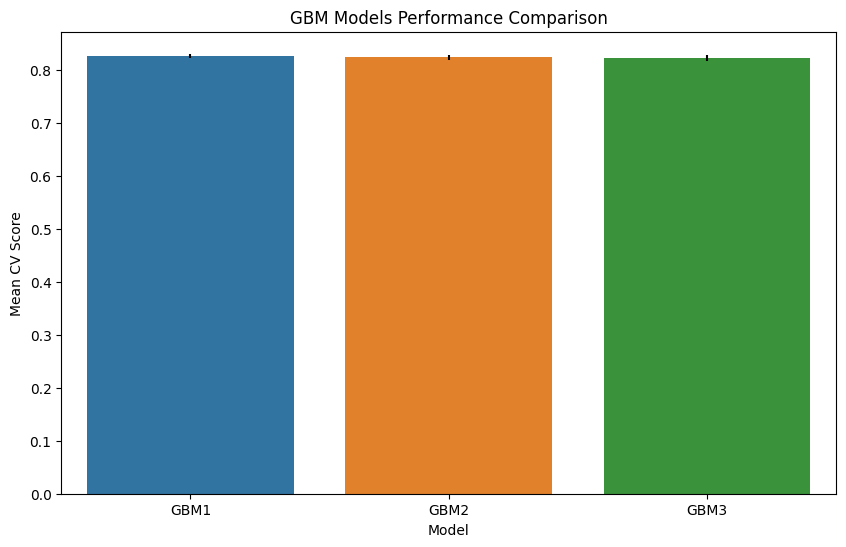

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean CV Score', yerr=results['Standard Deviation'], data=results)
plt.title('GBM Models Performance Comparison')
plt.show()


In [162]:
best_model = results.sort_values(by='Mean CV Score', ascending=False).iloc[0]
print("Best Model:\n", best_model)

Best Model:
 Model                     GBM1
Test Accuracy            0.833
Mean CV Score         0.826979
Standard Deviation    0.003985
Name: 0, dtype: object


### **Model 3 - CART Decision Tree Model**

**Decision Tree 1**

**Build the Model**

In [50]:
from sklearn.tree import plot_tree

In [51]:
dt1 = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [52]:
y_pred_dt1 = dt1.predict(X_test)
accuracy_dt1 = accuracy_score(y_test, y_pred_dt1)
print("DT Iteration 1 Accuracy:", accuracy_dt1)

DT Iteration 1 Accuracy: 0.8315


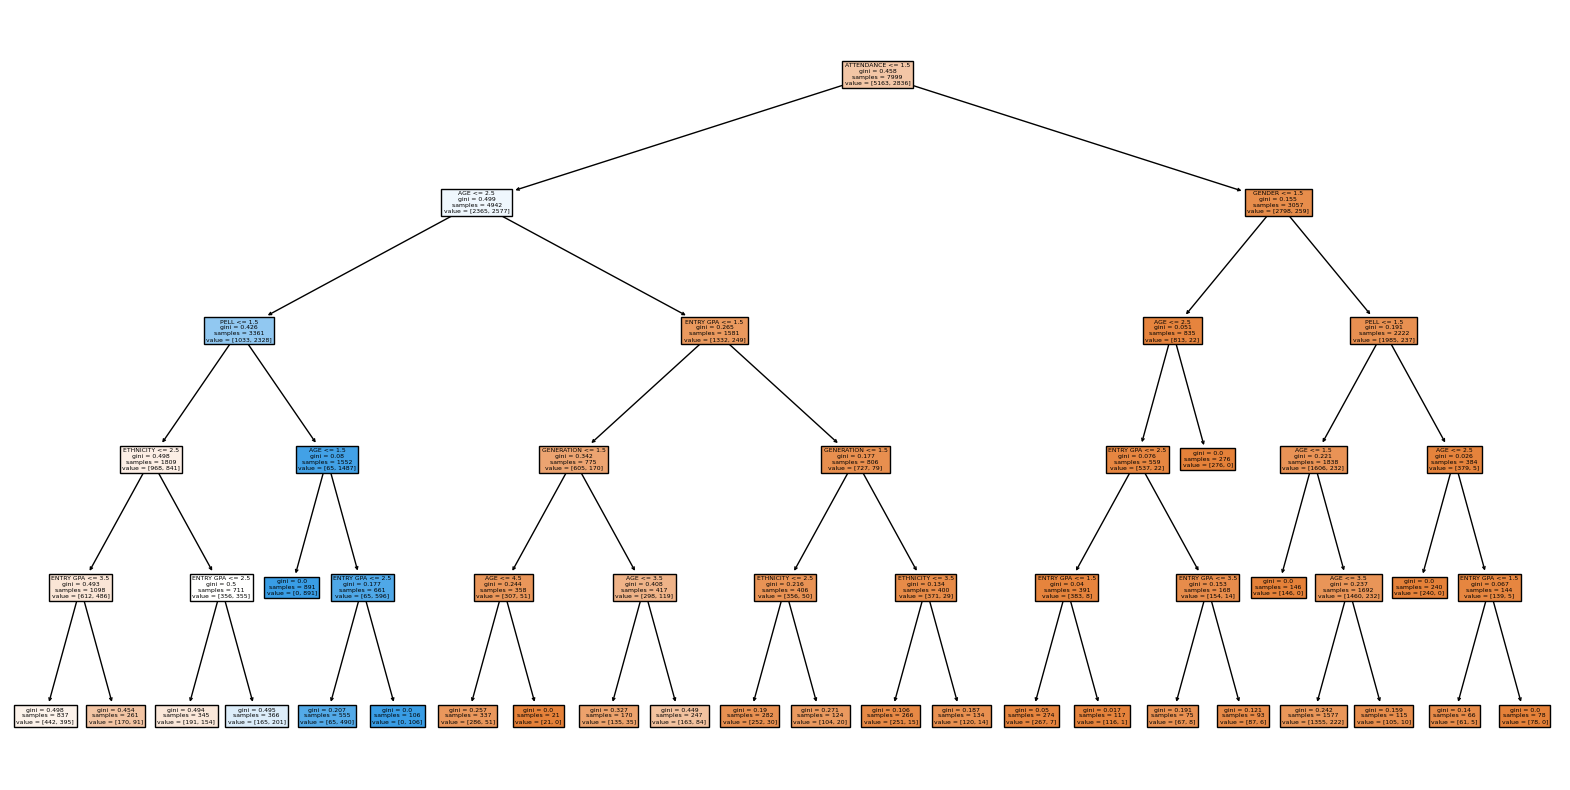

In [53]:
plt.figure(figsize=(20,10))
plot_tree(dt1, filled=True, feature_names=X.columns)
plt.show()

In [54]:
scores_dt1 = cross_val_score(dt1, X, y, cv=5)
avg_score_dt1 = np.mean(scores_dt1)
print("DT 1 Validation Score", scores_dt1)

DT 1 Validation Score [0.46       0.7115     0.43       0.594      0.80490245]


**Decision Tree 2 - Adjusting 'max_depth' and 'min_samples_split**

In [56]:
dt2 = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [57]:
y_pred_dt2 = dt2.predict(X_test)
accuracy_dt2 = accuracy_score(y_test, y_pred_dt2)
print("DT Iteration 2 Accuracy:", accuracy_dt2)

DT Iteration 2 Accuracy: 0.82


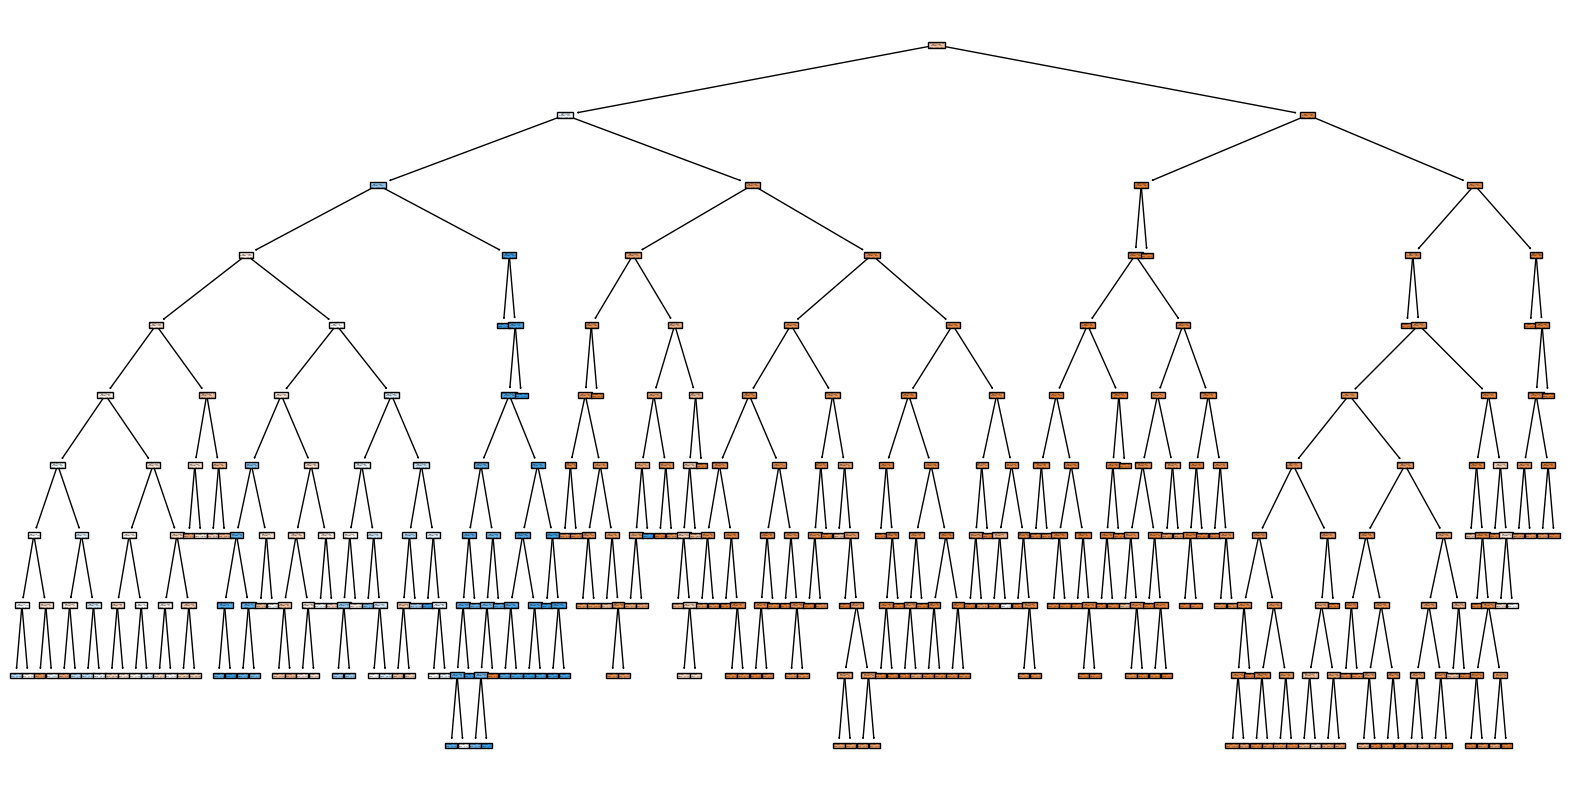

In [58]:
plt.figure(figsize=(20,10))
plot_tree(dt2, filled=True, feature_names=X.columns)
plt.show()

In [59]:
scores_dt2 = cross_val_score(dt2, X, y, cv=5)
avg_score_dt2 = np.mean(scores_dt2)
print("DT 2 Validation Score", scores_dt2)

DT 2 Validation Score [0.472      0.5035     0.513      0.4995     0.80490245]


**Decision Tree 3**

In [60]:
dt3 = DecisionTreeClassifier(max_depth=20, min_samples_split=10, random_state=42)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=10, random_state=42)

In [61]:
y_pred_dt3 = dt3.predict(X_test)
accuracy_dt3 = accuracy_score(y_test, y_pred_dt3)
print("DT Iteration 3 Accuracy:", accuracy_dt3)

DT Iteration 3 Accuracy: 0.82


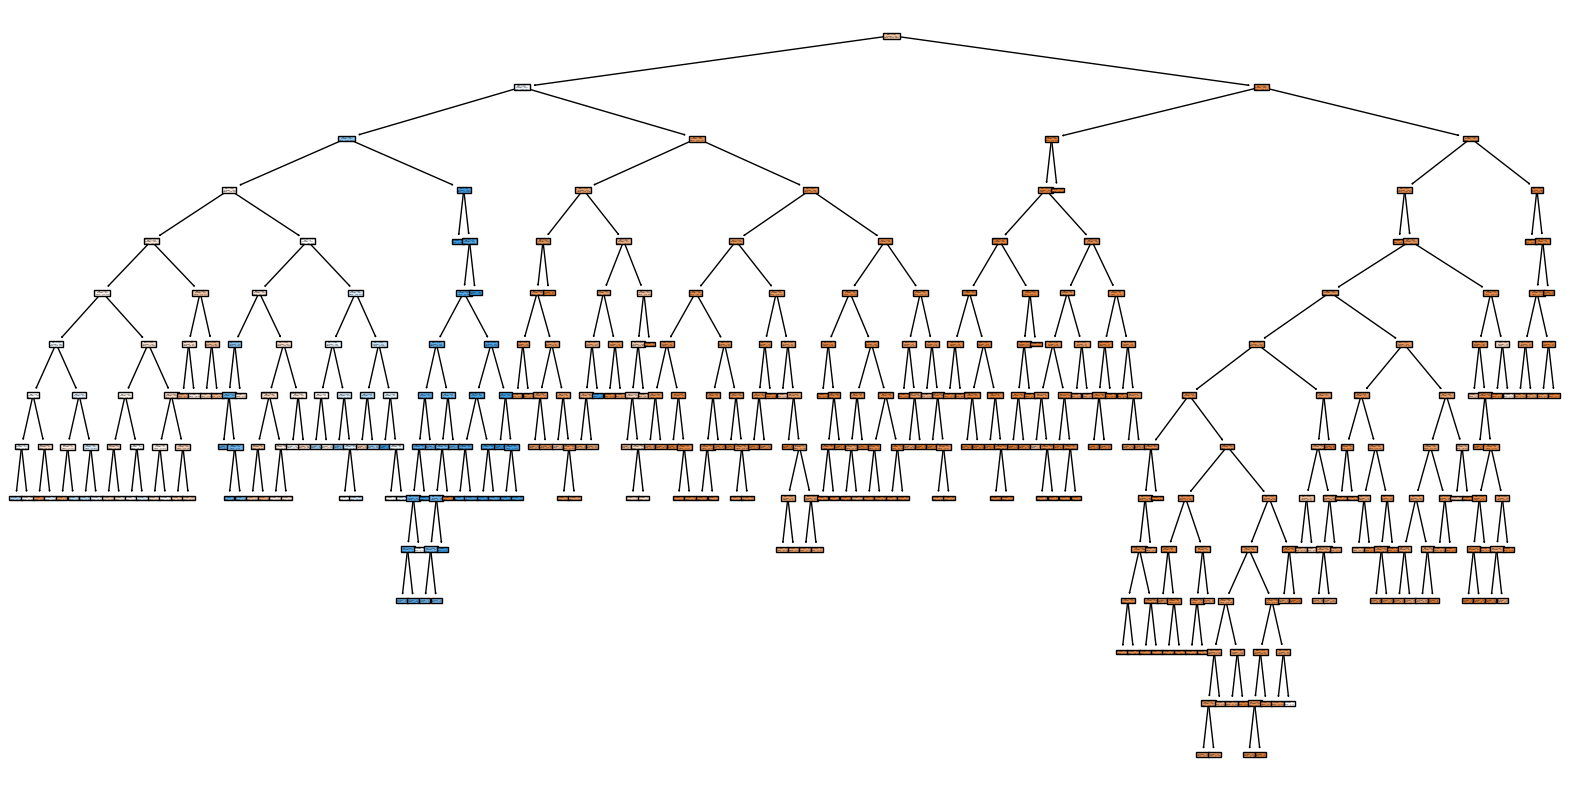

In [62]:
plt.figure(figsize=(20,10))
plot_tree(dt3, filled=True, feature_names=X.columns)
plt.show()

In [63]:
scores_dt3 = cross_val_score(dt3, X, y, cv=5)
avg_score_dt3 = np.mean(scores_dt3)
print("DT 3 Validation Score", scores_dt3)

DT 3 Validation Score [0.472      0.5055     0.465      0.4995     0.80490245]


**Visualize the Comparison**

**Decision Tree Models**

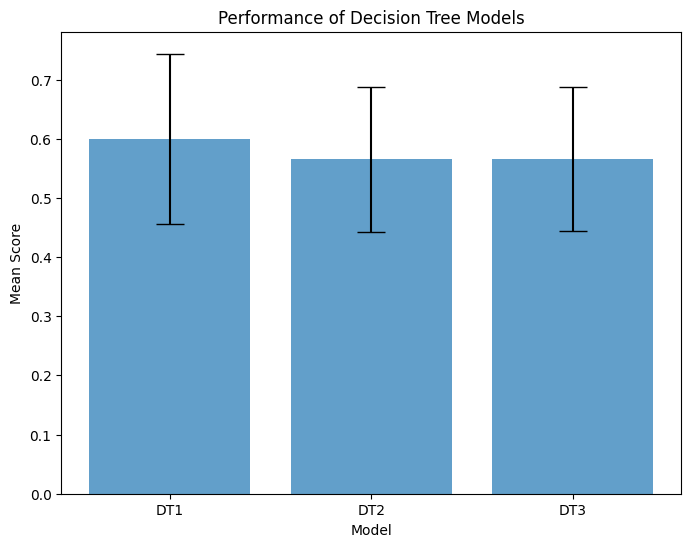

In [92]:
plt.figure(figsize=(8, 6))
x_pos = np.arange(len(models))

plt.bar(x_pos, mean_scores, yerr=std_devs, align='center', alpha=0.7, capsize=10)

plt.xticks(x_pos, models)
plt.ylabel('Mean Score')
plt.xlabel('Model')
plt.title('Performance of Decision Tree Models')

# Show the plot
plt.show()

In [165]:
dt1 = DecisionTreeClassifier(max_depth=5)
dt2 = DecisionTreeClassifier(max_depth=10)
dt3 = DecisionTreeClassifier(max_depth=20)

def evaluate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5)
    mean_score = np.mean(cv_scores)
    std_dev = np.std(cv_scores)
    return mean_score, std_dev


dt1_mean, dt1_std = evaluate_model(dt1, X, y)
dt2_mean, dt2_std = evaluate_model(dt2, X, y)
dt3_mean, dt3_std = evaluate_model(dt3, X, y)


In [167]:
results = pd.DataFrame({
    'Model': ['DT1', 'DT2', 'DT3'],
    'Mean Accuracy': [dt1_mean, dt2_mean, dt3_mean],
    'Standard Deviation': [dt1_std, dt2_std, dt3_std]
})
print(results)

  Model  Mean Accuracy  Standard Deviation
0   DT1        0.60008            0.143494
1   DT2        0.56518            0.122177
2   DT3        0.56538            0.122076


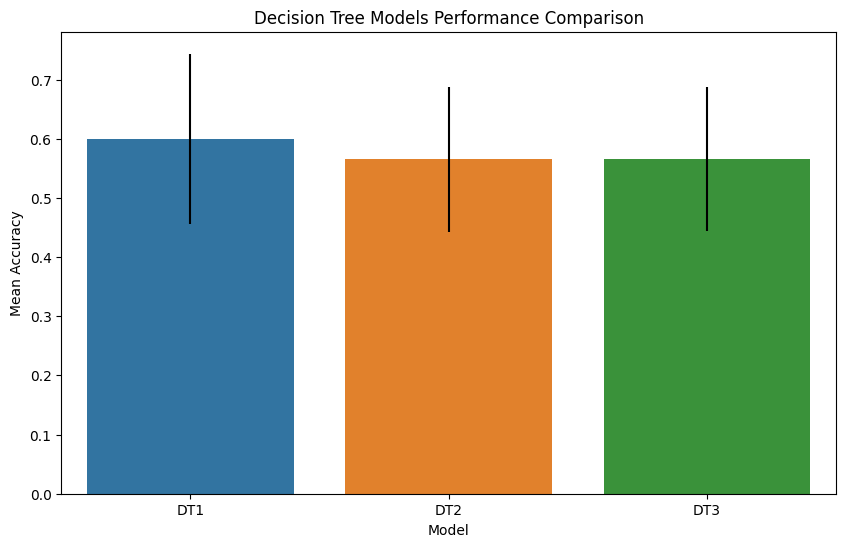

In [168]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Accuracy', yerr=results['Standard Deviation'], data=results)
plt.title('Decision Tree Models Performance Comparison')
plt.show()

In [169]:
best_model = results.sort_values(by='Mean Accuracy', ascending=False).iloc[0]
print("Best Model:", best_model['Model'])

Best Model: DT1


## **Model Comparison and Cross-Validation**

### **Scores - Model, Mean Accuracy, Standard Deviation Collected**

In [202]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=3)
rf2 = RandomForestClassifier(n_estimators=200, max_depth=5)
rf3 = RandomForestClassifier(n_estimators=50, max_depth=10)
gbm1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm2 = GradientBoostingClassifier(n_estimators=150, learning_rate=0.5, max_depth=4)
gbm3 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=5)
dt1 = DecisionTreeClassifier(max_depth=3)
dt2 = DecisionTreeClassifier(max_depth=5)
dt3 = DecisionTreeClassifier(max_depth=10)

In [203]:
def evaluate_model(model, X, y, cv_folds=5):
    cv_scores = cross_val_score(model, X, y, cv=cv_folds)
    mean_score = np.mean(cv_scores)
    std_dev = np.std(cv_scores)
    return mean_score, std_dev


rf1_mean, rf1_std = evaluate_model(rf1, X, y)
rf2_mean, rf2_std = evaluate_model(rf2, X, y)
rf3_mean, rf3_std = evaluate_model(rf3, X, y)
gbm1_mean, gbm1_std = evaluate_model(gbm1, X, y)
gbm2_mean, gbm2_std = evaluate_model(gbm2, X, y)
gbm3_mean, gbm3_std = evaluate_model(gbm3, X, y)
dt1_mean, dt1_std = evaluate_model(dt1, X, y)
dt1_mean, dt1_std = evaluate_model(dt1, X, y)
dt1_mean, dt1_std = evaluate_model(dt1, X, y)

In [204]:
data = {
    'Model': ['RF1', 'RF2', 'RF3', 'GBM1', 'GBM2', 'GBM3', 'DT1', 'DT2', 'DT3'],
    'Mean Accuracy': [mean_rf1, mean_rf1, mean_rf1, 0.826979, 0.824104, 0.823229, dt1_mean, dt2_mean, dt3_mean],
    'Standard Deviation': [std_dev_rf1, std_dev_rf2, std_dev_rf3, 0.003985, 0.005182, 0.005073, dt1_std, dt2_std, dt3_std],
    'Cross Validation': [cv]
    # Add other metrics if you have them
}

results_df = pd.DataFrame(data)
print(results_df)

def evaluate_model(model, X, y, cv_folds=5):
    cv_scores = cross_val_score(model, X, y, cv=cv_folds)
    mean_score = np.mean(cv_scores)
    std_dev = np.std(cv_scores)
    return mean_score, std_dev

  Model  Mean Accuracy  Standard Deviation
0   RF1       0.749180            0.153095
1   RF2       0.749180            0.131380
2   RF3       0.749180            0.115747
3  GBM1       0.826979            0.003985
4  GBM2       0.824104            0.005182
5  GBM3       0.823229            0.005073
6   DT1       0.701280            0.145324
7   DT2       0.565180            0.122177
8   DT3       0.565380            0.122076


### **Visualizing the Results**

**Mean and Standard Deviation**

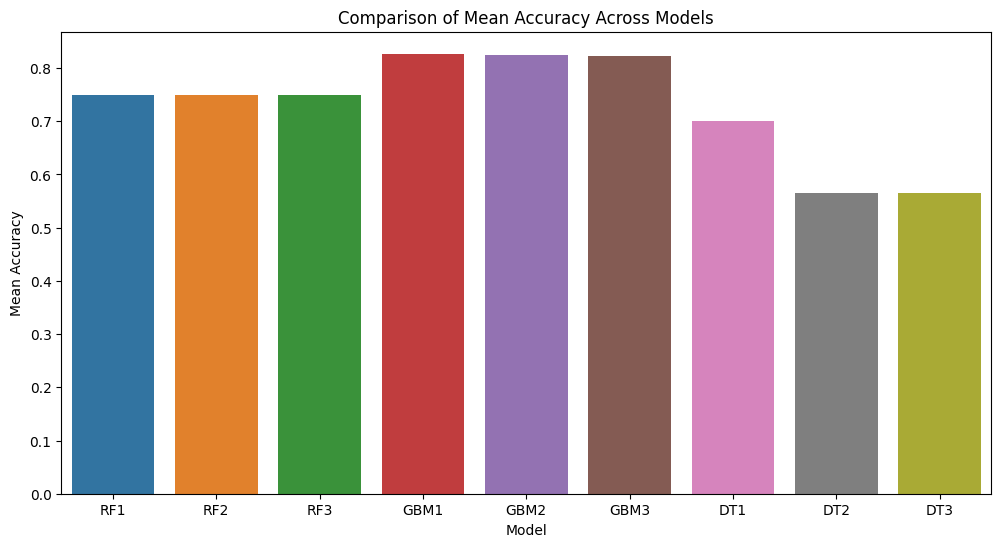

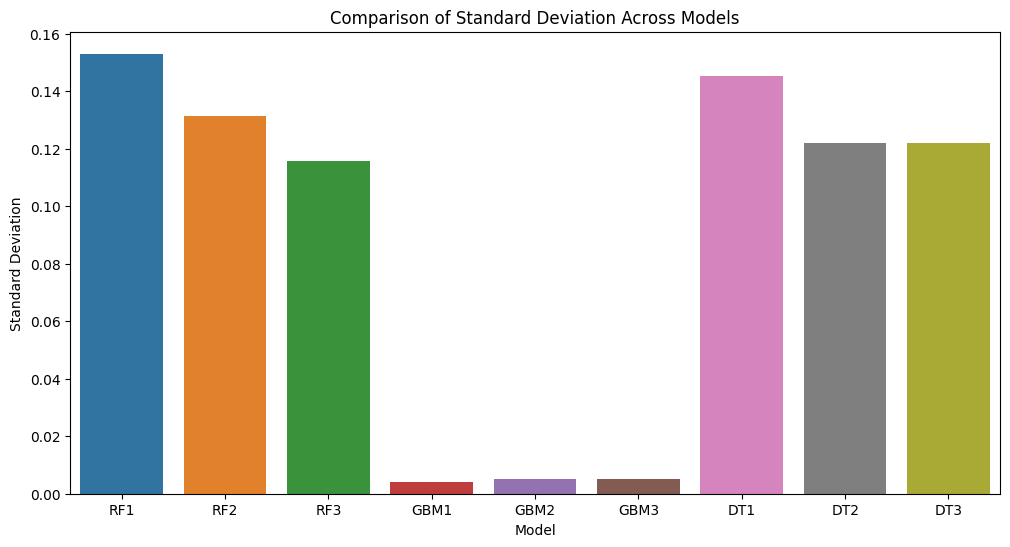

In [206]:
# Bar plot for Mean Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Mean Accuracy', data=results_df)
plt.title('Comparison of Mean Accuracy Across Models')
plt.show()

# Bar plot for Standard Deviation
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Standard Deviation', data=results_df)
plt.title('Comparison of Standard Deviation Across Models')
plt.show()



**Cross Validation**

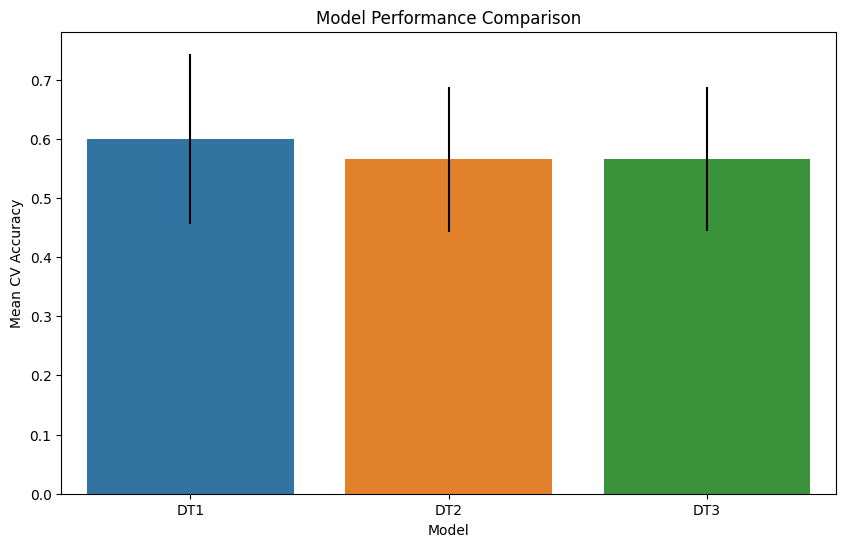

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Accuracy', yerr=results['Standard Deviation'], data=results)
plt.title('Model Performance Comparison')
plt.ylabel('Mean CV Accuracy')
plt.xlabel('Model')
plt.show()


In [207]:
summary = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Accuracy': [rf_mean, gbm_mean, dt_mean],
    'Standard Deviation': [rf_std, gbm_std, dt_std]
})


In [208]:
print(summary)

               Model  Mean Accuracy  Standard Deviation
0      Random Forest        0.73658            0.132379
1  Gradient Boosting        0.65038            0.114630
2      Decision Tree        0.58228            0.163844


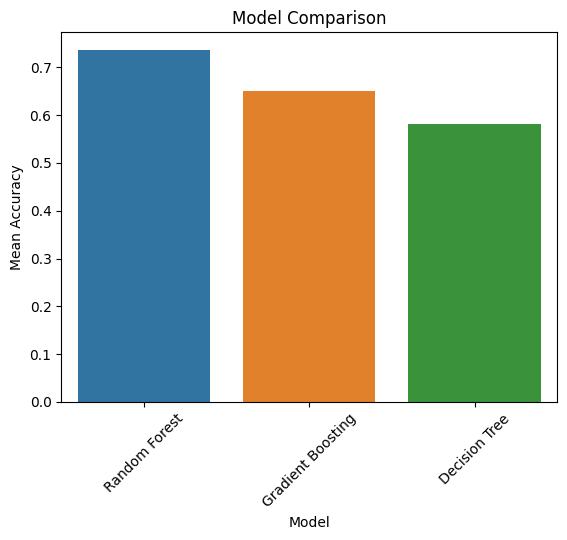

In [209]:
sns.barplot(x='Model', y='Mean Accuracy', data=summary)
plt.title('Model Comparison')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45)
plt.show()

**Confusion Matrix**

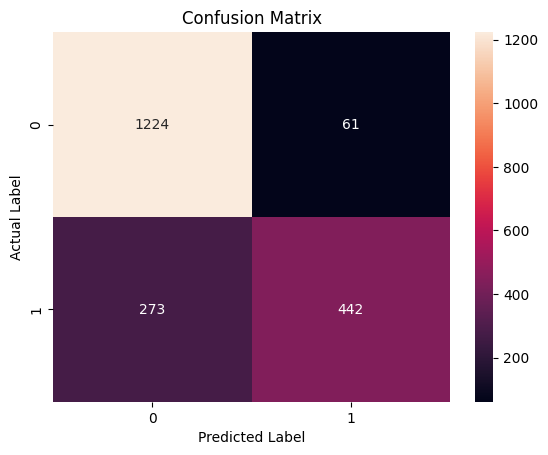

In [210]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Feature Importance**

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns

In [ ]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)


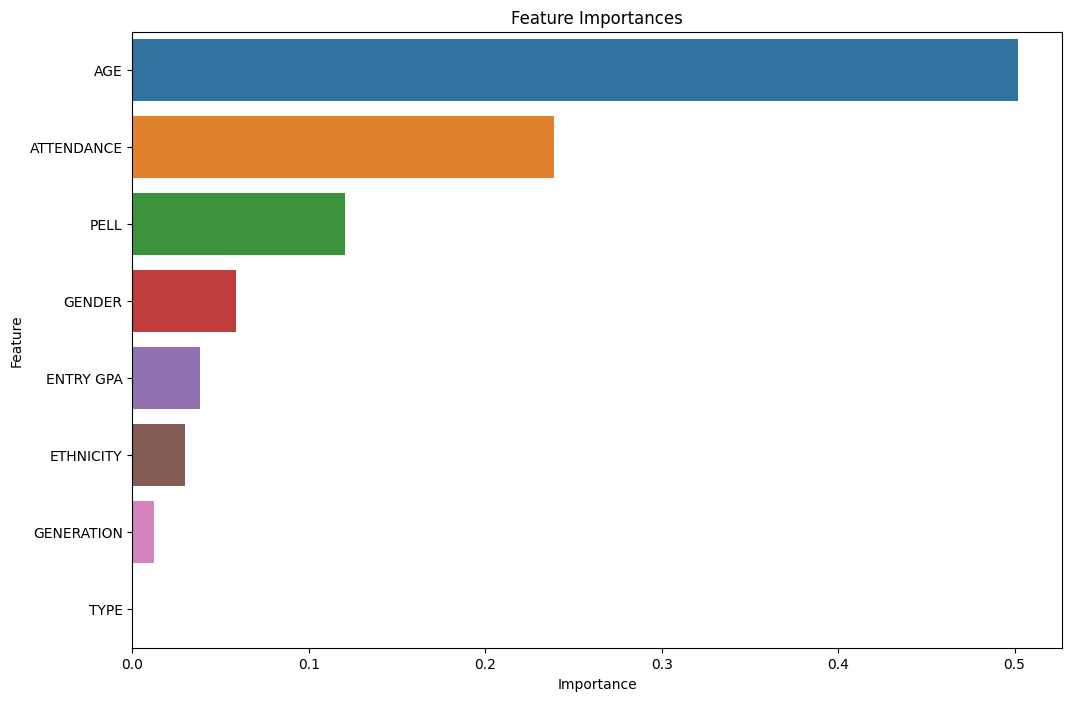

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## **Final Decision**

In [211]:
data = {
    'Model': ['RF1', 'RF2', 'RF3', 'GBM1', 'GBM2', 'GBM3', 'DT1', 'DT2', 'DT3'],
    'Mean Accuracy': [0.749180, 0.749180, 0.749180, 0.826979, 0.824104, 0.823229, 0.600080, 0.565180, 0.565380],
    'Standard Deviation': [0.153095, 0.131380, 0.115747, 0.003985, 0.005182, 0.005073, 0.143494, 0.122177, 0.122076]
}

results_df = pd.DataFrame(data)


In [212]:
# Sorting by 'Mean Accuracy' descending and then 'Standard Deviation' ascending
sorted_df = results_df.sort_values(by=['Mean Accuracy', 'Standard Deviation'], ascending=[False, True])
highest_performing_model = sorted_df.iloc[0]

print("Highest Performing Model:")
print(highest_performing_model)


Highest Performing Model:
Model                     GBM1
Mean Accuracy         0.826979
Standard Deviation    0.003985
Name: 3, dtype: object
